# Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de Dados

In [9]:
df = pd.read_csv('/datasets/games.csv')

## Checagem Preliminar dos Dados

In [10]:
#year_of_release está como tipo 'float64' e deveria ser tipo 'int'
#user_score está como tipo 'object' e poderia ser tipo 'int'/'float'
#Avaliar valores faltantes na análise e alterar os títulos para minúsculos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Preparação dos Dados

### Substituir os nomes das colunas (transformar tudo em minúsculos)








In [13]:
# tranformando tudo em minúsculo

df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
df['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object

In [16]:
df['user_score'] = df['user_score'].fillna(0)
df['user_score']

0          8
1          0
2        8.3
3          8
4          0
        ... 
16710      0
16711      0
16712      0
16713      0
16714      0
Name: user_score, Length: 16715, dtype: object

In [18]:
df['user_score'].value_counts()

0      6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [20]:
df['user_score'].value_counts().dropna(False)

0      6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [21]:
# substituir todas as ocorrências do valor 'tdb' na coluna 'user_score' por np.nan, marcando-as como valores ausentes (nulos).

df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df['user_score'].dtype)

float64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       14291 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [23]:
# excluído o código df['user_score'] = df['user_score'].fillna(0)

In [24]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [25]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,0.0,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [26]:
df['year_of_release'].value_counts(dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

### Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada

In [27]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [28]:
df['total_sales'] = df[['na_sales', 'eu_sales',
       'jp_sales', 'other_sales']].sum(axis=1)

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,31.38


## Análise de Dados

### Jogos lançados em anos diferentes 

In [30]:
releases_per_year = df['year_of_release'].value_counts().sort_index()
print(releases_per_year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


In [31]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df = df.dropna(subset=['year_of_release'])

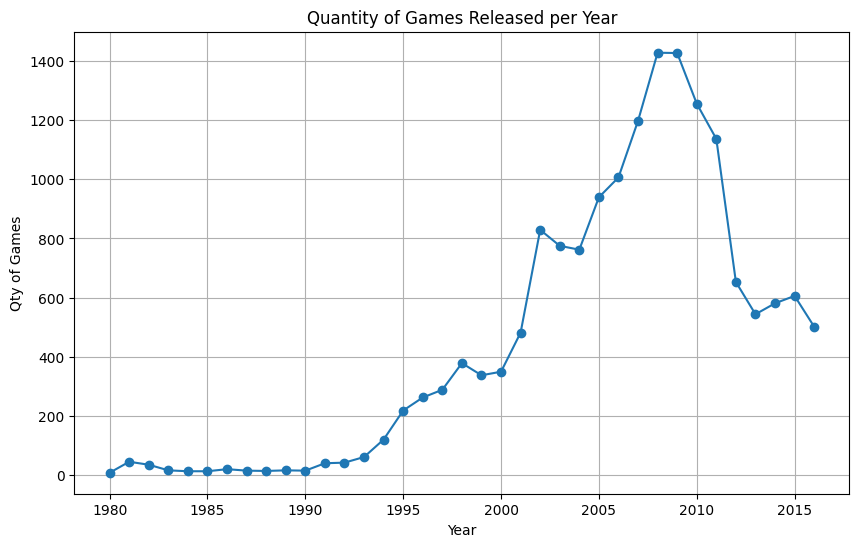

count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64


In [32]:
import matplotlib.pyplot as plt
releases_per_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(10,6))

plt.plot(releases_per_year.index.to_numpy(), releases_per_year.values, marker='o')
plt.title('Quantity of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Qty of Games')
plt.grid(True)
plt.show()

print(releases_per_year.describe())


#A maior concentração de lançamento de jogos ocorreu no período entre 2005 e 2010 com uma quantidade aproximada de 1427 jogos. A empresa vem cresecendo em lançamento desde 1980. No entanto, a partir de 2008 começou um declínio de lançamentos ano a ano.

###  Variação das vendas por plataformas e distribuição por ano

In [33]:
sales_per_platform_per_year = df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)
print(sales_per_platform_per_year)

platform
2600      86.48
3DO        0.10
3DS      257.81
DC        15.95
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
GEN       30.77
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       255.76
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
dtype: float64


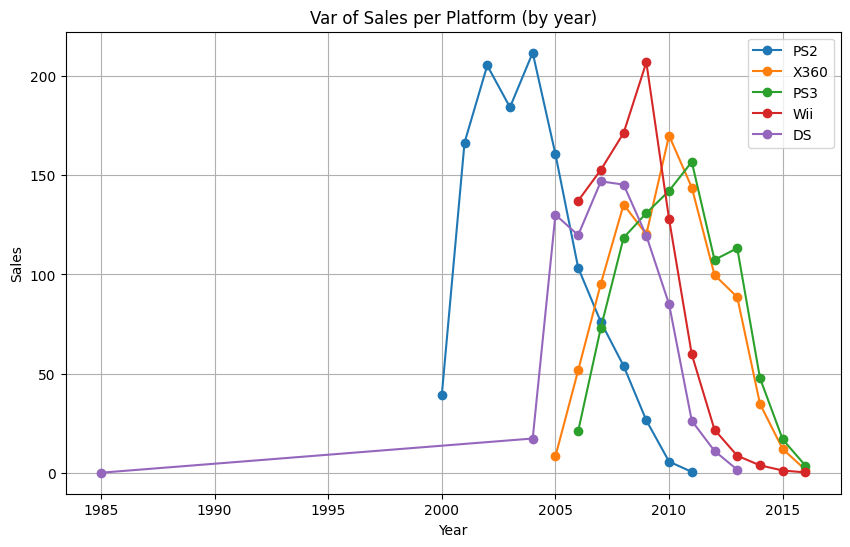

In [34]:
big_platforms = sales_per_platform_per_year.nlargest(5)
df_big_platforms = df[df['platform'].isin(big_platforms.index)]

plt.figure(figsize=(10, 6))

for platform in big_platforms.index:
    sales_annual = df_big_platforms[df_big_platforms['platform'] == platform].groupby('year_of_release')[['na_sales','eu_sales','jp_sales','other_sales']].sum().sum(axis=1)
    plt.plot(sales_annual.index, sales_annual.values, marker='o', label=platform)
    
plt.title('Var of Sales per Platform (by year)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()  
plt.show()

### Plataformas que costumavam ser populares

In [35]:
df = df.dropna(subset=['total_sales'])
df_sorted = df.sort_values(by='total_sales', ascending=False)
print(df_sorted[['name', 'platform', 'year_of_release', 'total_sales']].head(10))

                        name platform  year_of_release  total_sales
0                 Wii Sports      Wii           2006.0        82.54
1          Super Mario Bros.      NES           1985.0        40.24
2             Mario Kart Wii      Wii           2008.0        35.52
3          Wii Sports Resort      Wii           2009.0        32.77
4   Pokemon Red/Pokemon Blue       GB           1996.0        31.38
5                     Tetris       GB           1989.0        30.26
6      New Super Mario Bros.       DS           2006.0        29.80
7                   Wii Play      Wii           2006.0        28.91
8  New Super Mario Bros. Wii      Wii           2009.0        28.32
9                  Duck Hunt      NES           1984.0        28.31


In [36]:
# utilizei como critério uma lista de dez plataformas mais populares pelo total de vendas, incluindo o ano de lançamento. 

### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

In [37]:
# Considerando o gráfico no item 4.1, a maior relevância parece ser a partir do ano 2000.b

### Plataformas que estão liderando em vendas

In [38]:
sales_per_platform_per_year = df.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)
print(sales_per_platform_per_year.nlargest(10))

platform  year_of_release
PS2       2004.0             211.81
Wii       2009.0             206.97
PS2       2002.0             205.38
          2003.0             184.31
Wii       2008.0             171.32
X360      2010.0             170.03
PS        1998.0             169.49
PS2       2001.0             166.43
          2005.0             160.66
PS3       2011.0             156.78
dtype: float64


In [39]:
# acima as plataformas que lideram as vendar (por ano)

### Diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma  

<Figure size 1200x600 with 0 Axes>

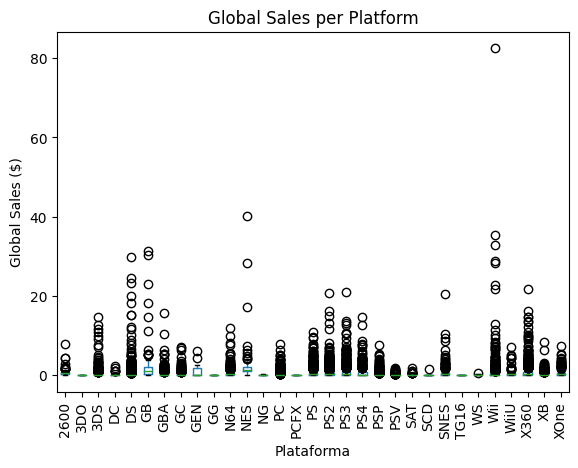

In [40]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
  
plt.figure(figsize=(12,6))
df.boxplot(column='total_sales', by='platform', grid=False, rot=90)
plt.title('Global Sales per Platform')
plt.xlabel('Plataforma')
plt.ylabel('Global Sales ($)')
plt.suptitle('')  
plt.show()

In [41]:
# o gráfico acima demonstra as vendas globais por plataforma, sendo que o Wii e Nes são as que tiveram melhores resultados.

###  Avaliações de usuários e profissionais que afetam as vendas de uma plataforma popular. Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. 

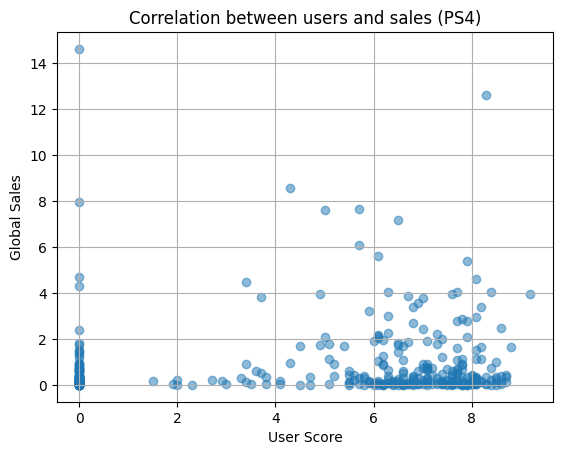

In [42]:
df['total_sales'] = df[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1)

df_ps4 = df[df['platform'] == 'PS4']

# Plotar gráfico de dispersão de User_Score vs. Global_sales
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.5)
plt.title('Correlation between users and sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()

### Distribuição geral de jogos por gênero

In [43]:
distribution_genre = df['genre'].value_counts()

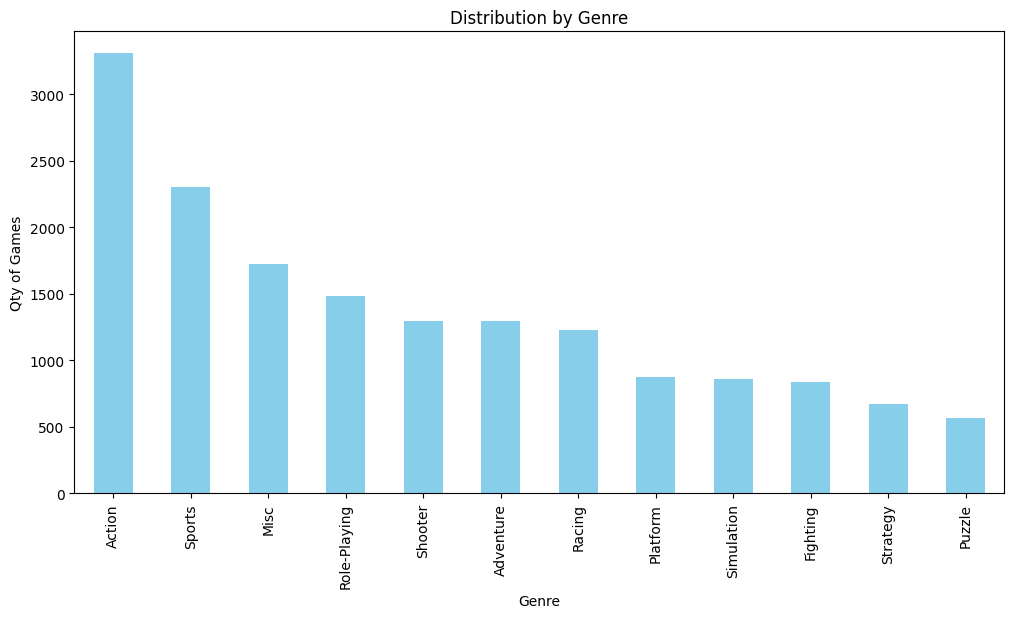

In [44]:
plt.figure(figsize=(12,6))
distribution_genre.plot(kind='bar', color='skyblue')
plt.title('Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Qty of Games')
plt.show()

In [45]:
# É possível notar que os gêneros mais requeridos são os de ação e o menos procurado o puzzle.

## Crie um perfil de usuário para cada região
Para cada região (AN, UE, JP), determine:
. As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
. Os cinco principais gêneros. Explique a diferença.
. As classificações do ESRB afetam as vendas em regiões individuais?

In [46]:
region_sales = df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

In [47]:
top_regions_na = region_sales['na_sales'].nlargest(3)
top_regions_eu = region_sales['eu_sales'].nlargest(3)
top_regions_jp = region_sales['jp_sales'].nlargest(3)
print(top_regions_na, top_regions_eu, top_regions_jp)

platform
X360    595.74
PS2     572.92
Wii     486.87
Name: na_sales, dtype: float64 platform
PS2     332.63
PS3     327.21
X360    268.32
Name: eu_sales, dtype: float64 platform
DS     175.02
PS     139.78
PS2    137.54
Name: jp_sales, dtype: float64


In [48]:
region_sales['na_market_share'] = (region_sales['na_sales'] / region_sales['na_sales'].sum()) * 100
print(region_sales['na_market_share'])

platform
2600     1.859919
3DO      0.000000
3DS      1.902975
DC       0.125023
DS       8.756447
GB       2.616504
GBA      4.239271
GC       3.037852
GEN      0.484666
GG       0.000000
N64      3.198333
NES      2.899705
NG       0.000000
PC       2.149107
PCFX     0.000000
PS       7.706760
PS2     13.191195
PS3      8.982547
PS4      2.503684
PSP      2.469838
PSV      0.287115
SAT      0.016578
SCD      0.023024
SNES     1.409790
TG16     0.000000
WS       0.000000
Wii     11.209937
WiiU     0.877233
X360    13.716614
XB       4.191840
XOne     2.144041
Name: na_market_share, dtype: float64


In [49]:
region_sales['eu_market_share'] = (region_sales['eu_sales'] / region_sales['eu_sales'].sum()) * 100
print(region_sales['eu_market_share'])

platform
2600     0.202482
3DO      0.000000
3DS      2.552693
DC       0.070411
DS       7.849730
GB       1.979410
GBA      3.107645
GC       1.596527
GEN      0.252061
GG       0.000000
N64      1.709434
NES      0.881173
NG       0.000000
PC       5.848238
PCFX     0.000000
PS       8.848809
PS2     13.858371
PS3     13.632557
PS4      5.878236
PSP      2.733927
PSV      0.544536
SAT      0.022498
SCD      0.014999
SNES     0.793264
TG16     0.000000
WS       0.000000
Wii     10.762392
WiiU     1.046992
X360    11.179022
XB       2.485199
XOne     2.149395
Name: eu_market_share, dtype: float64


In [50]:
region_sales['jp_market_share'] = (region_sales['jp_sales'] / region_sales['jp_sales'].sum()) * 100
print(region_sales['jp_market_share'])

platform
2600     0.000000
3DO      0.007748
3DS      7.795951
DC       0.663221
DS      13.560399
GB       6.595024
GBA      3.607429
GC       1.653405
GEN      0.209194
GG       0.003099
N64      2.615696
NES      7.643317
NG       0.111570
PC       0.013171
PCFX     0.002324
PS      10.830034
PS2     10.656481
PS3      6.152618
PS4      1.236567
PSP      5.879117
PSV      1.692144
SAT      2.499477
SCD      0.034866
SNES     9.030194
TG16     0.012397
WS       0.110020
Wii      5.290276
WiiU     1.008004
X360     0.952993
XB       0.106921
XOne     0.026343
Name: jp_market_share, dtype: float64


In [51]:
# Podemos notar por algumas diferenças de games entre as regiões norte-americanas (na), eu (europa) e jp(japão). Na região 'Na' temos que os principais games são X360, PS2 e Wii, possivelmente pelo investimento massivo da Microsoft e Nintendo regionalmente. Já na região 'Eu' o que prevalece é o PS2, PS3 E O X360, com atuação forte da Sony.  Ja para a região 'Jp' os 3 maiores são DS, DC e PS2. O Japão é famoso pelo gosto maior em jogos RGP, diferentemente dos EUA que gostam mais de Xbox. 

## Teste as seguintes hipóteses:

— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Defina o valor do limiar alfa você mesmo.

Explique:

— Como você formula as hipóteses alternativas e nulas.

— Quais critérios você usou para testar as hipóteses, e por quê

In [52]:
# definição de alfa = 0.05
# hipótese nula (ho) = As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas
# hipótese alternativa (h1) = As classificações médias dos usuários das plataformas Xbox One e PC são diferentes

# hipótese nula (ho) = As classificações médias dos usuários para os gêneros Action (ação) e Sports (esportes) são iguais
# hipótese alternativa (h1) = As classificações médias dos usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

# cálculo do valor-p (hipótese nula verdadeira); se valor-p < alfa, então rejeitamos a  hipótese nula

In [53]:
import pandas as pd
import scipy.stats as st

In [54]:
alpha= 0.05

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['platform'] = df['platform'].str.lower()

score_of_xboxone = df[df['platform'] == 'xone']['user_score'].dropna()
score_of_pc = df[df['platform'] == 'pc']['user_score'].dropna()


results = st.ttest_ind(score_of_xboxone, score_of_pc, equal_var=False)
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

valor-p:  0.00013349751690568348
Rejeitamos a hipótese nula


In [55]:
import pandas as pd
import scipy.stats as st

sports = df[df['genre'] == 'Sports']['user_score'].dropna()
action = df[df['genre'] == 'Action']['user_score'].dropna()

alpha= 0.05

results = st.ttest_ind(sports, action, equal_var=False)
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

valor-p:  0.0008355224522757965
Rejeitamos a hipótese nula


In [48]:
sorted(df['platform'].unique())

['2600',
 '3do',
 '3ds',
 'dc',
 'ds',
 'gb',
 'gba',
 'gc',
 'gen',
 'gg',
 'n64',
 'nes',
 'ng',
 'pc',
 'pcfx',
 'ps',
 'ps2',
 'ps3',
 'ps4',
 'psp',
 'psv',
 'sat',
 'scd',
 'snes',
 'tg16',
 'wii',
 'wiiu',
 'ws',
 'x360',
 'xb',
 'xone']

In [49]:
score_of_xboxone

99       0.0
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16597    6.0
16630    8.2
16643    6.6
16645    0.0
16660    6.7
Name: user_score, Length: 236, dtype: float64

In [50]:
score_of_pc

85       7.6
138      7.3
192      4.0
195      0.0
218      8.2
        ... 
16690    0.0
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 908, dtype: float64

In [ ]:
df['d']

In [56]:
sports = df[df['genre'] == 'Sports']['user_score'].dropna()
action = df[df['genre'] == 'Action']['user_score'].dropna()

## Conclusão Geral

As vendas aumentaram após os anos 2000, havendo uma queda expressiva após 2010. O total de vendas maior no período analisado demonstra que o maior total de vendas está em Wii Sports. Embora este último seja do gênero Sports, há uma preferência do público por games de Ação. Os mercados regionais tem preferências diferentes de plataformas, o que pode ser proporcionado pela cultura local e também a forte presença de empresas de games e sua nacionalidade.